# Linear Modelling on Boston DataSet with Exploratory Analysis<b>

In [1]:
 %matplotlib inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
import statsmodels.api as sm

import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

# special matplotlib argument for improved plots
from matplotlib import rcParams
from sklearn.datasets import load_boston
boston = load_boston()
print(boston.keys())
#print(boston)
print(boston.data.shape)
print(boston.feature_names)
print(boston.DESCR)

bos = pd.DataFrame(boston.data)
print(bos.head())

bos.columns = boston.feature_names
print(bos.head())

bos['PRICE'] = boston.target
print(bos.head())

bos = bos[bos['PRICE'] <45]  #Ignoring outliers to better the model

X = bos.drop('PRICE', axis = 1)
Y = bos['PRICE']

#importing required packages to load data from sklearn library 
#utilizing boston dataset that comes from sklearn library available at UCI machine learning repository to work on standardized data

dict_keys(['data', 'target', 'feature_names', 'DESCR'])
(506, 13)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      in

Some Statistics of the Housing Price:

count    484.000000
mean      21.317975
std        7.371392
min        5.000000
25%       16.600000
50%       20.800000
75%       24.500000
max       44.800000
Name: PRICE, dtype: float64


/Users/Radhika/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j



The median of the Housing Price is:  20.8


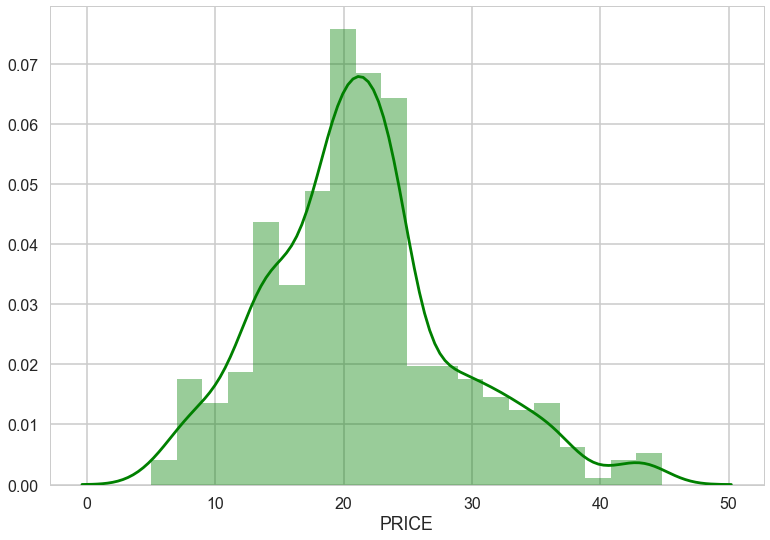

In [2]:
print("Some Statistics of the Housing Price:\n")
print(bos['PRICE'].describe())
sns.distplot(bos['PRICE'], kde = True, color = 'g')
print("\nThe median of the Housing Price is: ", bos['PRICE'].median(axis = 0))

#Drawing the median of House Price to visualize the Price of Boston 

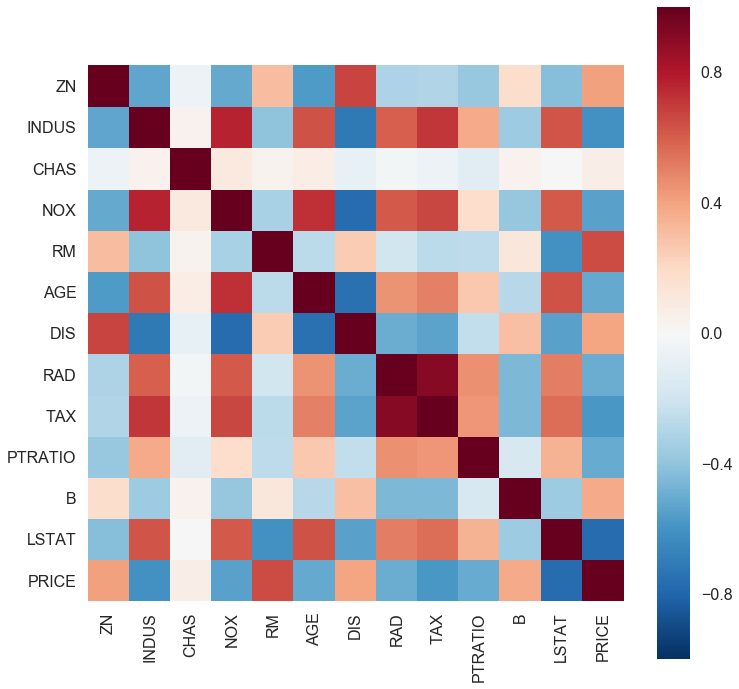

In [20]:
corr = bos.select_dtypes(include = ['float64', 'int64']).iloc[:, 1:].corr()
plt.figure(figsize=(12, 12))
sns.heatmap(corr, vmax=1, square=True)

#Using seaborn package to draw a heatmap displaying correlation between variables in dataset

# Visualizing the variables under the data to check the relation between each other

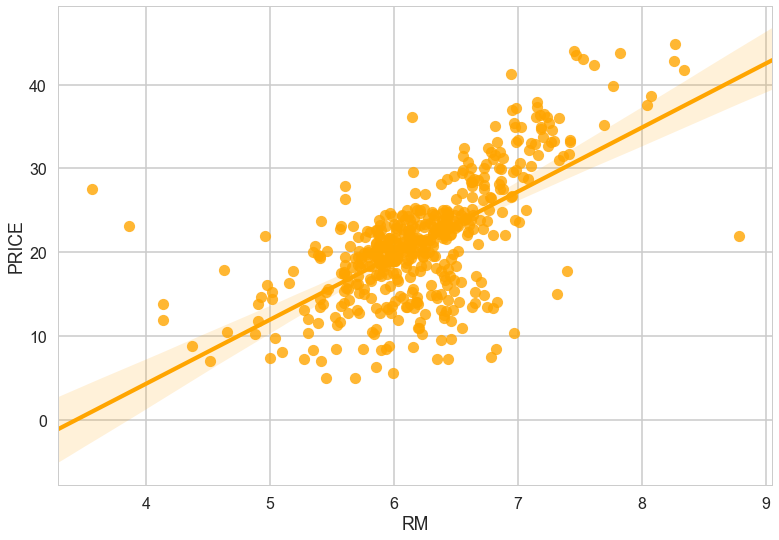

In [3]:
sns.regplot(x = 'RM', y = 'PRICE', data = bos, color = 'Orange')
#The Price has a direct correlation with Number of Rooms in the House, this is evident by the regression plot below

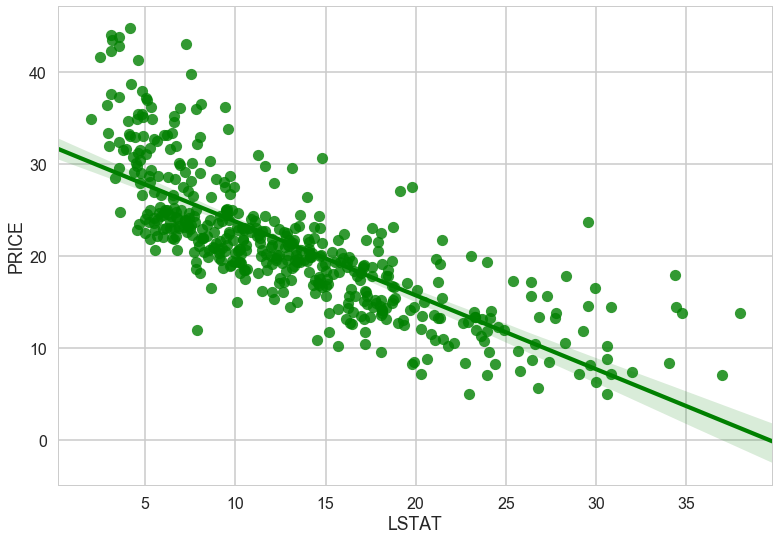

In [4]:
sns.regplot(x = 'LSTAT', y = 'PRICE', data = bos, color = 'Green')
#The Linear regression displayed below clearly indicates that as the % of population with lower income increases the PRICE of the house gets lowered

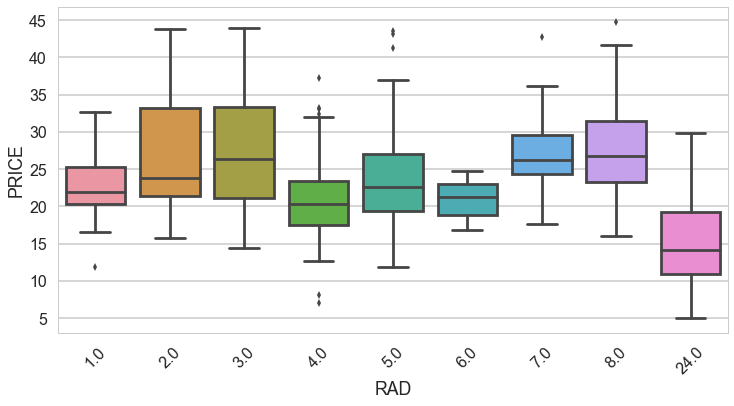

In [5]:
plt.figure(figsize = (12, 6))
sns.boxplot(x = 'RAD', y = 'PRICE',  data = bos)
xt = plt.xticks(rotation=45)
#Below Visualization displays the Radial distance to the state highways vs Price
#However there is no clear trend that indicates a direct propartionality

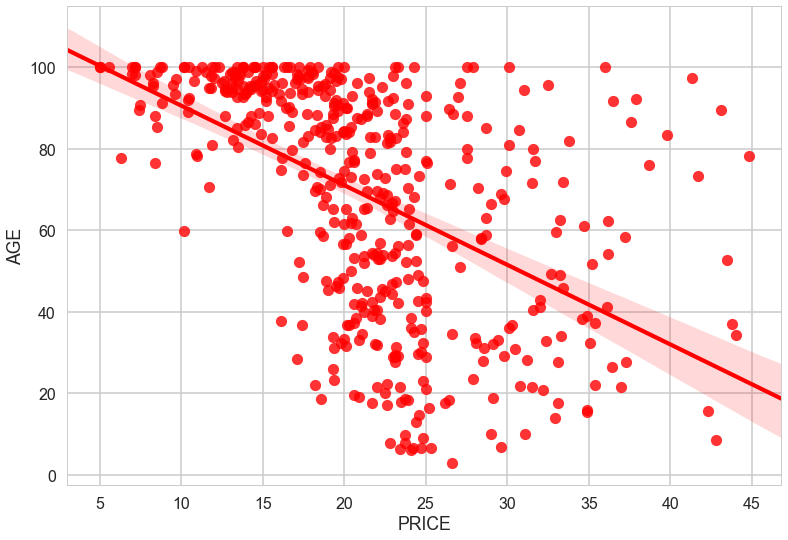

In [6]:

sns.regplot(x = 'PRICE', y = 'AGE', data = bos, color = 'Red')
#Below visualization indiactes that Price of a house decreases as the average Age of the locality increases

# Building the Linear Model with variables using cross_validation package from sklearn

In [7]:
from sklearn import cross_validation 
X = bos.drop('PRICE', axis = 1)
Y = bos['PRICE']

X_train, X_test, Y_train, Y_test = sklearn.cross_validation.train_test_split(X, Y, test_size = 0.33, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

#Creating test/train datasets for cross-validation, printing the shape of datsets to re-verify the size of the datasets

(324, 13)
(160, 13)
(324,)
(160,)


/Users/Radhika/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


[ -1.13078590e-01   3.98065284e-02  -1.12702721e-01   2.32300612e-01
  -1.12675573e+01   2.88006535e+00  -2.17309821e-02  -1.25912181e+00
   2.64204060e-01  -1.28530861e-02  -8.29656073e-01   7.06606816e-03
  -3.80664041e-01]
37.7861437318


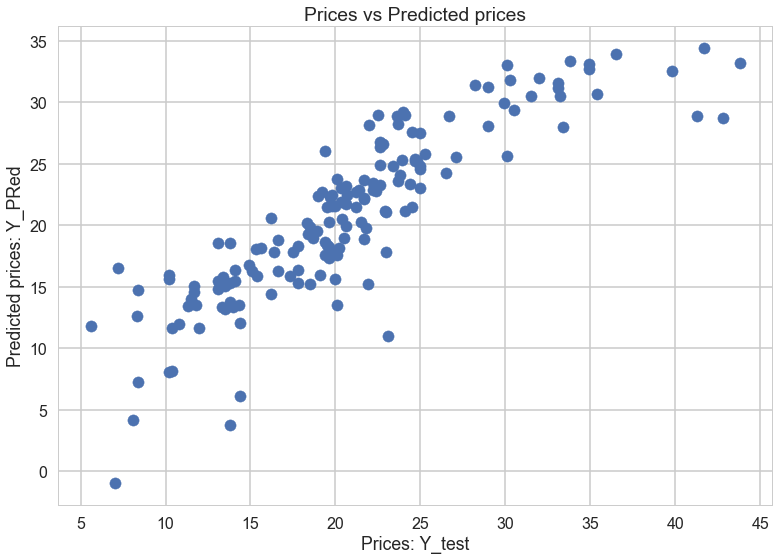

In [8]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, Y_train)
print(lm.coef_)
print(lm.intercept_)
Y_pred = lm.predict(X_test)

plt.scatter(Y_test, Y_pred)
plt.xlabel("Prices: Y_test")
plt.ylabel("Predicted prices: Y_PRed")
plt.title("Prices vs Predicted prices")
plt.show()

#Displaying the predicted vs original prices of Dataset

Equation:
    Y = 37.78 -1.13078590e-01*ZN +3.98065284e-02*INDUS -1.12702721e-01*CHAS +2.32300612e-01*NOX -1.12675573e+01*RM 
+2.88006535e+00*AGE -2.17309821e-02*DIS -1.25912181e+00*RAD +2.64204060e-01*TAX -1.28530861e-02*PTRATIO
-8.29656073e-01*B +7.06606816e-03*LSTAT -3.80664041e-01*MEDV

In [9]:
mse = sklearn.metrics.mean_squared_error(Y_test, Y_pred)
print( "MSE  = ", (mse))

#Finding the Mean Squared Error of the Model which is suitable for the model

MSE  =  13.6106772497


In [10]:
from sklearn.metrics import r2_score
r2 =  r2_score(Y_test, Y_pred) 
print( "r2 score (coef determination) = ", r2_score(Y_test, Y_pred))

#The R-square is also under acceptable limits

r2 score (coef determination) =  0.75308362414


# Re-confirming the correctness of Linear Model by Residual plot

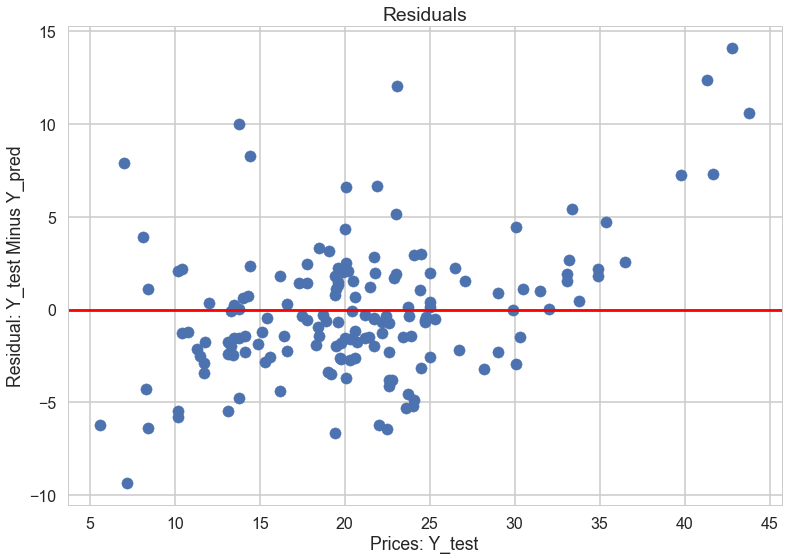

In [11]:
plt.scatter(Y_test, Y_test-Y_pred)
plt.xlabel("Prices: Y_test")
plt.ylabel("Residual: Y_test Minus Y_pred")
plt.axhline(0, color='red')
plt.title("Residuals")

#Ploting the residuals which is Target_Test minus Target_Pred vs Target_Test

In [46]:
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import f_regression
Selector_f = SelectPercentile(f_regression, percentile=10)
Selector_f.fit(X,Y)
for n,s in zip(boston.feature_names,Selector_f.scores_):
    
     print ('F-score: %3.2ft for feature %s ' % (s,n))
#applying stepwise regression to get F-score of each variable and getting a selector 

F-score: 132.12t for feature CRIM 
F-score: 98.24t for feature ZN 
F-score: 277.75t for feature INDUS 
F-score: 1.93t for feature CHAS 
F-score: 201.98t for feature NOX 
F-score: 356.87t for feature RM 
F-score: 170.75t for feature AGE 
F-score: 87.80t for feature DIS 
F-score: 155.26t for feature RAD 
F-score: 242.47t for feature TAX 
F-score: 161.14t for feature PTRATIO 
F-score: 80.86t for feature B 
F-score: 698.03t for feature LSTAT 


In [44]:
from sklearn.feature_selection import RFECV
from sklearn.svm import SVR
#X, y = make_friedman1(n_samples=50, n_features=10, random_state=0)
estimator = SVR(kernel="linear")
selector = RFECV(estimator, step=1, cv=5)
selector = selector.fit(X, Y)
#selector.support_ 
selector.grid_scores_
print('Optimal number of features: %d'% selector.n_features_)



Optimal number of features: 13


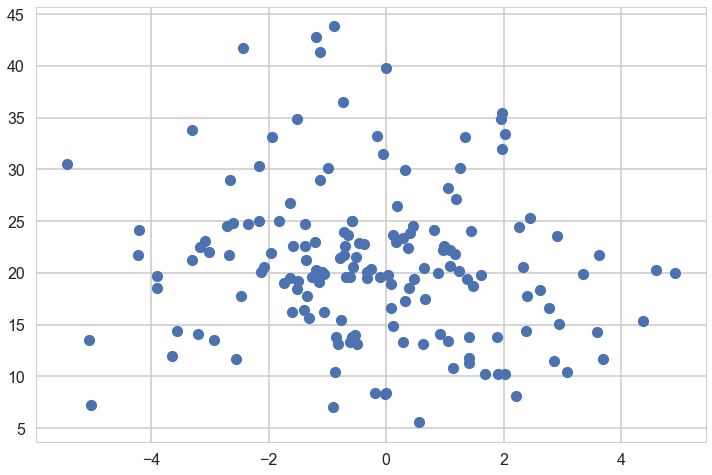

In [56]:

import numpy.random as random
import pandas as pd
import matplotlib.pyplot as plt
norm=random.normal(0,2,len(Y_test))
norm.sort()
plt.figure(figsize=(12,8),facecolor='1.0') 
plt.plot(norm,Y_test,"o")

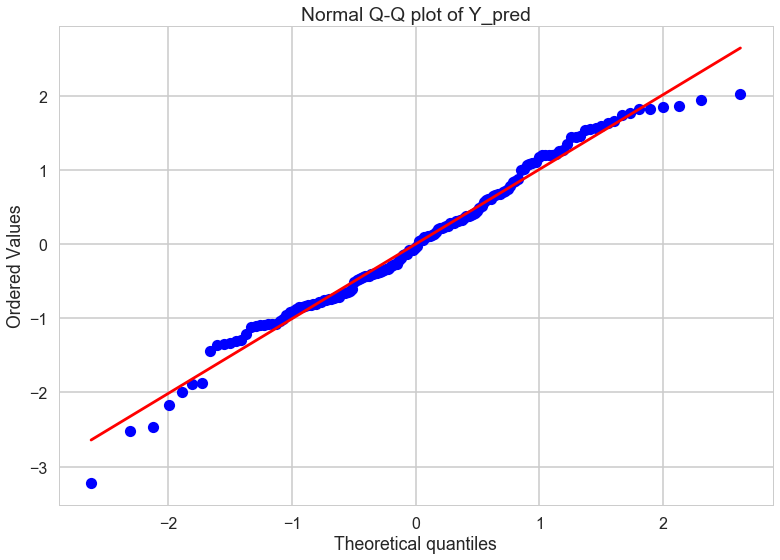

In [59]:
import scipy.stats as stats

z = (Y_pred-np.mean(Y_pred))/np.std(Y_pred)
stats.probplot(z, dist="norm", plot=plt)
plt.title("Normal Q-Q plot of Y_pred")
plt.show()

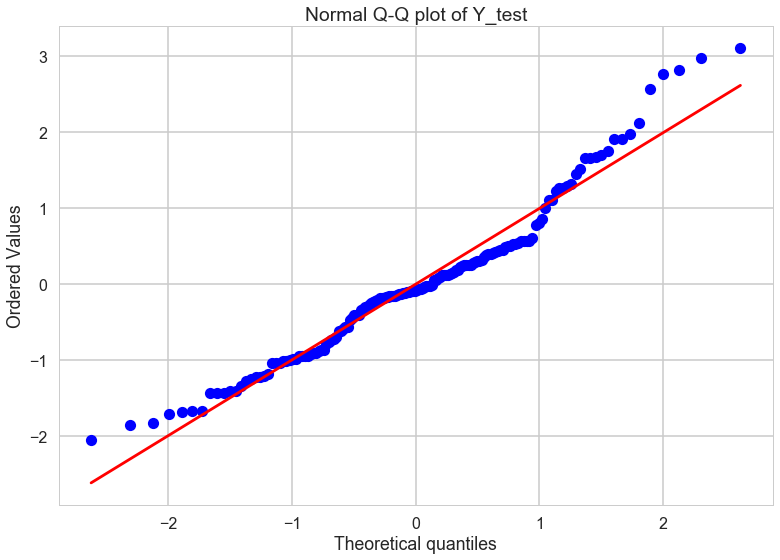

In [60]:
import scipy.stats as stats
z = (Y_test-np.mean(Y_test))/np.std(Y_test)
stats.probplot(z, dist="norm", plot=plt)
plt.title("Normal Q-Q plot of Y_test")
plt.show()

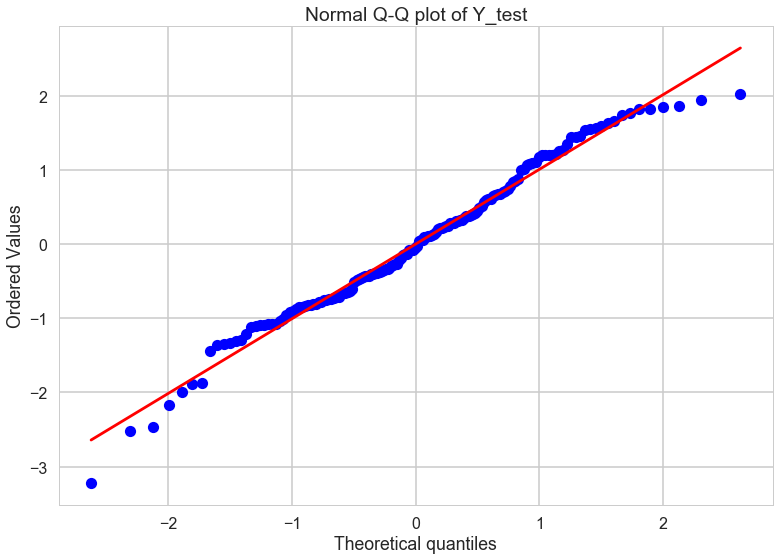